In [1]:
!pip install ../dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix
from rekomenda.als import ALSMetrics, BiasOnlyALS, LatentFactorALS, OptimizedLatentFactorALS
from rekomenda.utils import load_data

In [11]:
train, test  = load_data(filepath='../ml-32m/ratings.csv', split_ratio=0.8)

In [12]:
train_csr, test_csr = CSRMatrix.from_coo(train), CSRMatrix.from_coo(test)

In [13]:
train_csc, test_csc = CSCMatrix.from_coo(train), CSCMatrix.from_coo(test)

In [22]:
train_als = OptimizedLatentFactorALS(lambda_reg=0.1, n_factors=20, use_parallel=True)

In [25]:
start = time.time()
train_als.fit(csr_matrix=train_csr, csc_matrix=train_csc,n_iterations=60,compute_metrics_every=5)
end = time.time()

print(f"Total time taken {end - start}")

Iteration 5/60 - RMSE: 0.6624, NLL: 5799930.9248
Iteration 10/60 - RMSE: 0.6424, NLL: 5432630.4586
Iteration 15/60 - RMSE: 0.6366, NLL: 5317588.2252
Iteration 20/60 - RMSE: 0.6341, NLL: 5263549.5169
Iteration 25/60 - RMSE: 0.6327, NLL: 5231738.0181
Iteration 30/60 - RMSE: 0.6318, NLL: 5210501.8219
Iteration 35/60 - RMSE: 0.6312, NLL: 5195325.3868
Iteration 40/60 - RMSE: 0.6308, NLL: 5184012.2519
Iteration 45/60 - RMSE: 0.6305, NLL: 5175309.0466
Iteration 50/60 - RMSE: 0.6302, NLL: 5168457.3968
Iteration 55/60 - RMSE: 0.6300, NLL: 5162958.5170
Iteration 60/60 - RMSE: 0.6299, NLL: 5158474.4634
Total time taken 1333.5679552555084


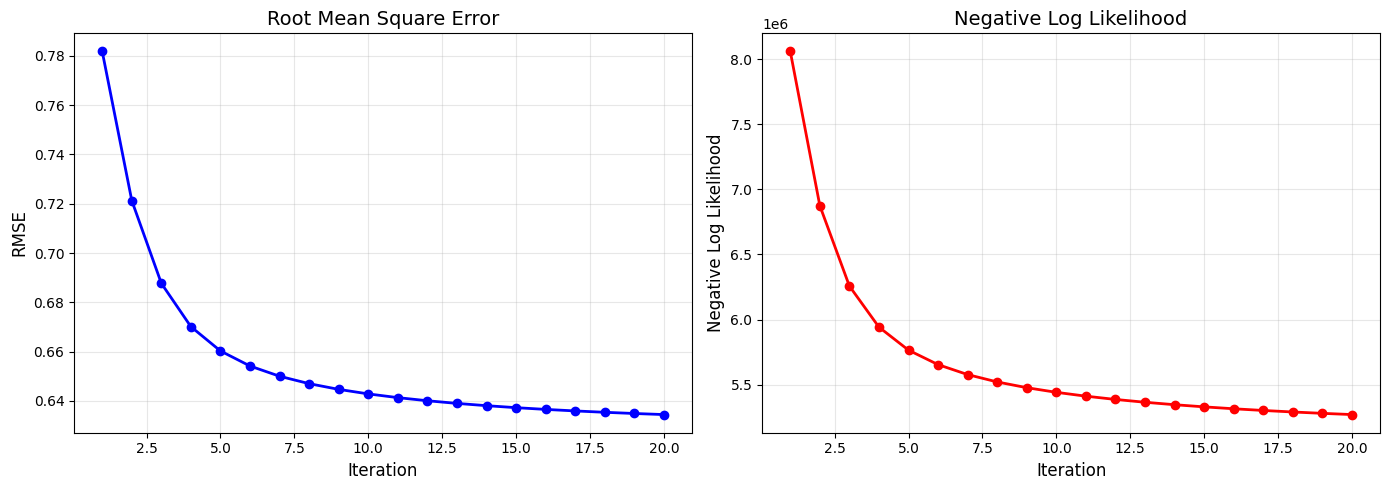

In [24]:
train_als.plot_metrics(output='pics/als-bias-with-latent-train-32m.pdf')